0.6867838044308633


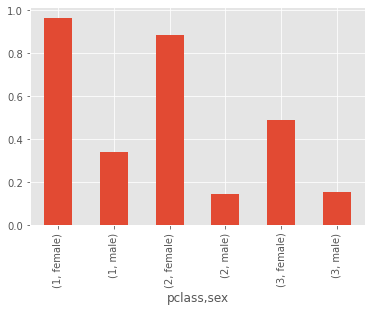

In [63]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format


df = pd.read_excel('titanic.xls', 'titanic3', index_col=None, na_values=['NA'])
df.drop(['body','name','home.dest','embarked'], 1, inplace=True)
df.fillna(0, inplace=True)

# print(df.head())

df['survived'].mean()   # overall survival chance of a Titanic Passenger
df.groupby('pclass').mean()

class_sex_grouping = df.groupby(['pclass','sex']).mean()
# class_sex_grouping
class_sex_grouping['survived'].plot.bar()

# group_by_age = pd.cut(df["age"], np.arange(0, 90, 10))
# age_grouping = df.groupby(group_by_age).mean()
# age_grouping['survived'].plot.bar()
# df.count()
# df = df.drop(['body','cabin','boat'], axis=1)
# df["home.dest"] = df["home.dest"].fillna("NA")
# df = df.dropna()
# df.count()

def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
#     processed_df.embarked = le.fit_transform(processed_df.embarked)
#     processed_df = processed_df.drop(['name','ticket','home.dest'],axis=1)
    return processed_df

preprocess_titanic_df(df)

def handle_non_numerical_data(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)


df.drop(['sex','boat'], 1, inplace=True)
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

AttributeError: 'DataFrame' object has no attribute 'convert_objects'

In [13]:
!pip3 install xlrd

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 96 kB 371 kB/s eta 0:00:01
